In [38]:
import re
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.copy_on_write = True

In [39]:
# Loads data collected when testing
raw_data = pd.read_excel("./data/sensor_data.xlsx")
display(raw_data)

,TIME,c_p2,c_p12,c_p13,c_p11,c_p14,c_p16,c_p15,c_p10,c_p9,...,c_p7,c_p6,c_p5,c_p1,c_p3,c_GMU_GEAR,c_p16.1,a_SteerAngle,adu.accX,rpm
0,0.000,917.0,918.0,918.0,921.0,921.0,919.0,919.0,920.0,917.0,...,917.0,918.0,913.0,919.0,917.0,1.0,919.0,-30.0,0.026,0.0
1,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,920.0,NaN,NaN,NaN,NaN,0.029,NaN
2,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,919.0,NaN,NaN,NaN,NaN,0.026,NaN
3,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0,NaN,NaN
4,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,919.0,NaN,NaN,NaN,NaN,0.025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82411,549.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,918.0,NaN,NaN,NaN,NaN,-0.009,NaN
82412,549.416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,918.0,NaN,NaN,NaN,NaN,0.003,NaN
82413,549.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.0,NaN,NaN
82414,549.424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,918.0,NaN,NaN,NaN,NaN,-0.017,NaN


In [40]:
# Drops rows between sensor values(with NaN)
data = raw_data.dropna()
display(data)

,TIME,c_p2,c_p12,c_p13,c_p11,c_p14,c_p16,c_p15,c_p10,c_p9,...,c_p7,c_p6,c_p5,c_p1,c_p3,c_GMU_GEAR,c_p16.1,a_SteerAngle,adu.accX,rpm
0,0.00,917.0,918.0,918.0,921.0,921.0,919.0,919.0,920.0,917.0,...,917.0,918.0,913.0,919.0,917.0,1.0,919.0,-30.0,0.026,0.0
6,0.04,917.0,919.0,918.0,920.0,922.0,919.0,918.0,920.0,916.0,...,917.0,918.0,913.0,919.0,917.0,1.0,919.0,-30.0,0.023,0.0
12,0.08,917.0,919.0,918.0,921.0,921.0,919.0,918.0,919.0,917.0,...,917.0,918.0,913.0,920.0,917.0,1.0,919.0,-31.0,0.026,0.0
18,0.12,917.0,919.0,918.0,921.0,921.0,919.0,918.0,919.0,917.0,...,917.0,917.0,913.0,919.0,917.0,1.0,919.0,-30.0,0.035,0.0
24,0.16,917.0,919.0,918.0,920.0,921.0,919.0,919.0,919.0,917.0,...,917.0,917.0,912.0,919.0,917.0,1.0,919.0,-30.0,0.031,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,549.24,916.0,917.0,917.0,920.0,921.0,918.0,918.0,919.0,916.0,...,917.0,917.0,912.0,918.0,916.0,0.0,918.0,-45.0,0.005,0.0
82392,549.28,916.0,918.0,916.0,920.0,920.0,918.0,917.0,918.0,916.0,...,916.0,918.0,912.0,918.0,916.0,0.0,918.0,-45.0,0.012,0.0
82398,549.32,916.0,918.0,917.0,920.0,920.0,918.0,918.0,918.0,916.0,...,917.0,916.0,913.0,918.0,915.0,0.0,918.0,-46.0,0.002,0.0
82404,549.36,916.0,917.0,917.0,920.0,921.0,918.0,917.0,918.0,916.0,...,917.0,916.0,912.0,918.0,916.0,0.0,918.0,-45.0,0.025,0.0


In [41]:
ROLLING_RADIUS = 0.195
GEAR_RATIOS = {
    0 : sys.maxsize, 
    1 : 5.805,
    2 : 4.091,
    3 : 3.284,
    4 : 2.844
}


# Adds velocity column(calculated based on RPM, current gear, and the wheal radius
data["velocity"] = round(data["rpm"]/data["c_GMU_GEAR"].map(GEAR_RATIOS)*(np.pi/30)/3.445*ROLLING_RADIUS*3.5,0)

# Extracts sensor columns 
is_sensor = re.compile("c_p")
sensor_column_names = list(filter(is_sensor.match, data.columns))

# Creates dataframe with just pressure vs velocity data
velocity_pressure_df = data[sensor_column_names]
velocity_pressure_df["velocity"] = data["velocity"]

display(velocity_pressure_df)



,c_p2,c_p12,c_p13,c_p11,c_p14,c_p16,c_p15,c_p10,c_p9,c_p8,c_p4,c_p7,c_p6,c_p5,c_p1,c_p3,c_p16.1,velocity
0,917.0,918.0,918.0,921.0,921.0,919.0,919.0,920.0,917.0,917.0,916.0,917.0,918.0,913.0,919.0,917.0,919.0,0.0
6,917.0,919.0,918.0,920.0,922.0,919.0,918.0,920.0,916.0,917.0,915.0,917.0,918.0,913.0,919.0,917.0,919.0,0.0
12,917.0,919.0,918.0,921.0,921.0,919.0,918.0,919.0,917.0,918.0,916.0,917.0,918.0,913.0,920.0,917.0,919.0,0.0
18,917.0,919.0,918.0,921.0,921.0,919.0,918.0,919.0,917.0,917.0,915.0,917.0,917.0,913.0,919.0,917.0,919.0,0.0
24,917.0,919.0,918.0,920.0,921.0,919.0,919.0,919.0,917.0,917.0,916.0,917.0,917.0,912.0,919.0,917.0,919.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,916.0,917.0,917.0,920.0,921.0,918.0,918.0,919.0,916.0,916.0,915.0,917.0,917.0,912.0,918.0,916.0,918.0,0.0
82392,916.0,918.0,916.0,920.0,920.0,918.0,917.0,918.0,916.0,916.0,914.0,916.0,918.0,912.0,918.0,916.0,918.0,0.0
82398,916.0,918.0,917.0,920.0,920.0,918.0,918.0,918.0,916.0,916.0,915.0,917.0,916.0,913.0,918.0,915.0,918.0,0.0
82404,916.0,917.0,917.0,920.0,921.0,918.0,917.0,918.0,916.0,916.0,915.0,917.0,916.0,912.0,918.0,916.0,918.0,0.0


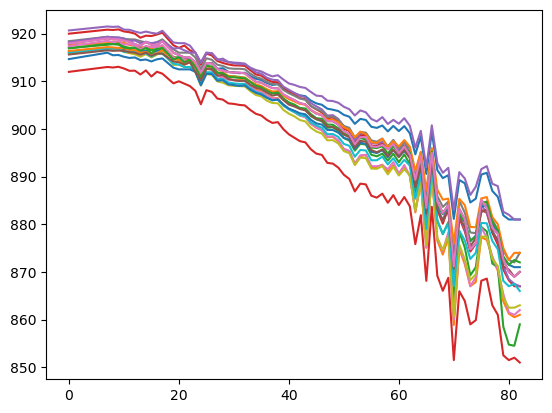

In [42]:
# Groups pressure readings by velocity for plotting
pressure_by_velocity = velocity_pressure_df.groupby("velocity").mean()

plt.plot(pressure_by_velocity)

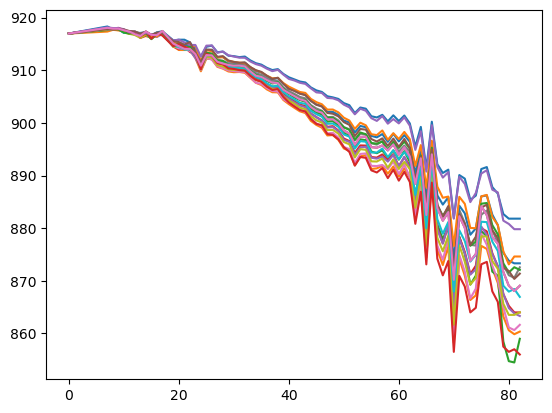

In [43]:
# Normalizes data to mean reading(adjusts for lack of calibration)
mean = pressure_by_velocity.mean(1)[0]

for column in pressure_by_velocity.columns:
    delta = mean - pressure_by_velocity[column][0]
    pressure_by_velocity[column] += delta
    
plt.plot(pressure_by_velocity)

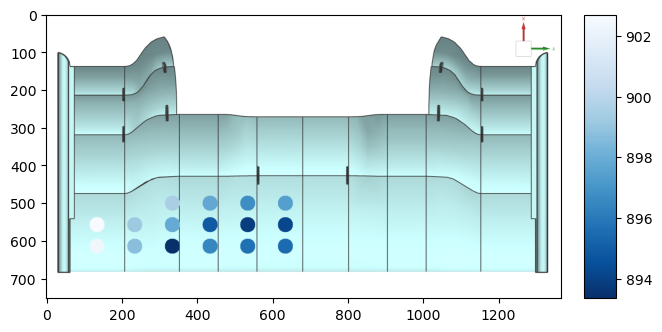

In [44]:
# Adds sensor readings to - for validating simulations(simulation result for comparison in data/ folder)

# Sets up sensor locations on image
hd = 100
vd = 57

pixels = {"1" : (135,615), "2" : (135,615-vd), "3" : (135+hd,615), "4" : (135+hd,615-vd), "5" : (135+2*hd,615), "6" : (135+2*hd,615-vd), "7" : (135+2*hd,615-2*vd), "8" : (135+3*hd,615), "9" : (135+3*hd,615-vd), "10" : (135+3*hd,615-2*vd), "11" : (135+4*hd,615), "12" : (135+4*hd,615-vd), "13" : (135+4*hd,615-2*vd), "14" : (135+5*hd,615), "15" : (135+5*hd,615-vd), "16" : (135+5*hd,615-2*vd)}


# Selects 54th row(54km/h is the simulation velocity)
graph_init = (pressure_by_velocity.loc[[54]].drop(columns="c_p16.1"))

# Sorts the columns to align with dictionary positions
graph_first = graph_init.reindex(sorted(graph_init.columns, key=lambda str : int(str[3:])), axis=1).to_numpy()[0]

# Normalizes the values of pressure readings(increases readability)
graph = MinMaxScaler().fit_transform(np.array(graph_first).reshape(-1,1)).reshape(1, 16)[0]

# Prepares wing img for processing
img = cv2.imread("data/wing_img.png")
wing = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Adds pressure dots to wing image
cmap = mpl.colormaps["Blues_r"]

for _, i in enumerate(graph):
    cv2.circle(wing, pixels[str(_+1)], 20, tuple(cmap(i)[j]*255 for j in range(3)), -1)


# Exports wing with dots
cv2.imwrite("./data/wing_dots.png", cv2.cvtColor(wing, cv2.COLOR_RGB2BGR))

# Creates plot 
plt.subplot(211)
plt.imshow(wing.astype(np.uint8))
plt.subplots_adjust(bottom=0.2, right=1, top=1.5)
cax = plt.axes((1, 0.91, 0.05, 0.59))
norm = mpl.colors.Normalize(vmin=min(graph_first), vmax=max(graph_first))
mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
plt.show()

